<a href="https://colab.research.google.com/github/VishnuBhaarath/Learningcurves/blob/master/Learningcurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


In [0]:
a=7

In [0]:
from scipy import io
loaded = io.loadmat('ex5data1.mat')

In [0]:
loaded['Xtest']

array([[-33.31800399],
       [-37.91216403],
       [-51.20693795],
       [ -6.13259585],
       [ 21.26118327],
       [-40.31952949],
       [-14.54153167],
       [ 32.55976024],
       [ 13.39343255],
       [ 44.20988595],
       [ -1.14267768],
       [-12.76686065],
       [ 34.05450539],
       [ 39.22350028],
       [  1.97449674],
       [ 29.6217551 ],
       [-23.66962971],
       [ -9.01180139],
       [-55.94057091],
       [-35.70859752],
       [  9.51020533]])

In [0]:
X=loaded['X']

In [0]:
X.shape

(12, 1)

In [0]:
y=loaded['y']

In [0]:
y

array([[ 2.13431051],
       [ 1.17325668],
       [34.35910918],
       [36.83795516],
       [ 2.80896507],
       [ 2.12107248],
       [14.71026831],
       [ 2.61418439],
       [ 3.74017167],
       [ 3.73169131],
       [ 7.62765885],
       [22.7524283 ]])

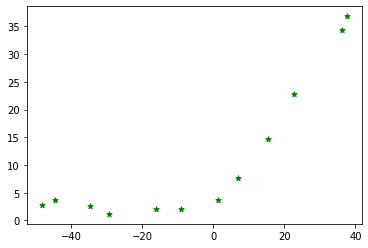

In [0]:
plt.scatter(X, y, label= "stars", color= "green", marker= "*", s=30);

In [0]:
f=np.ones([12, 1], dtype = int) 

In [0]:
X = np.column_stack((f, X)) 

In [0]:
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
theta0=1;
theta1=1;
theta=[[theta0],[theta1]];

In [0]:
theta

[[1], [1]]

In [0]:
 h=np.dot(X,theta)
 t=np.subtract(h,y)

In [0]:
np.sum(np.square(t))/24

303.9515255535976

In [0]:
np.sum(np.square(np.subtract(np.dot(X,theta),y)))/24

303.9515255535976

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y) 
Y_pred = linear_regressor.predict(X)  # make predictions

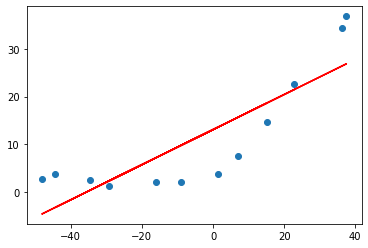

In [0]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [0]:
train_sizes = [1, 3, 5, 8]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = 'X'
target = 'y'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X =loaded[features],
y = loaded[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [0]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-58.51852597  -6.57319009  -6.57319009  -6.57319009  -6.57319009]
 [-44.30016454 -18.66313266 -26.30809762 -26.30809762 -26.30809762]
 [-51.37458791 -37.44764914 -54.06935734 -36.34571739 -36.34571739]]

 ----------------------------------------------------------------------

Validation scores:

 [[-827.48611597 -401.59942884  -79.19249676   -2.56520775 -227.64182874]
 [ -28.04278722  -90.07729735  -55.33112235 -153.50697999  -59.88315011]
 [ -30.58988852  -70.50530841  -44.57844879 -120.37394254  -92.19887214]
 [ -54.97096682  -87.81397604  -19.22557536  -96.90507481  -50.76346675]]


In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1    -0.000000
3    16.962257
5    28.377518
8    43.116606
dtype: float64

 --------------------

Mean validation scores

 1    307.697016
3     77.368267
5     71.649292
8     61.935812
dtype: float64


(0, 100)

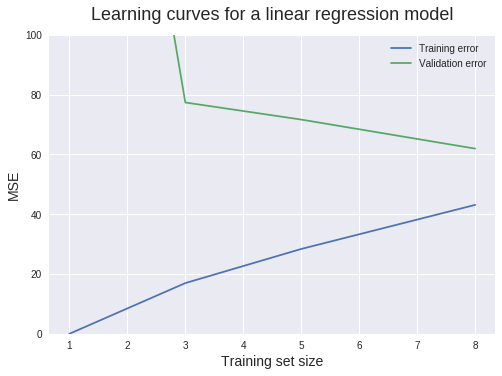

In [0]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,100)